<a href="https://colab.research.google.com/github/kellyham0/DS1002/blob/main/Copy_of_Lab_FTX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS1002 Lab 1:  FTX

### Due Monday 1 April at noon

In this lab you will work with a dataset, writing python to generate the deliverables specified in the cells below.

> **FTX** was a cryptocurrency exchange founded by Sam Bankman-Fried that saw both a spectacular rise and collapse between 2021 and 2022. At one point it had a valuation of $32B. In November Bankman-Fried was found guilty on seven counts of fraud and conspiracy.  His sentencing hearing is today.

The dataset for this assignment covers that rise and fall from the viewpoint of daily stock closing prices for FTX (ticker symbol `FTT`).

Answer the questions below with the appropriate Python code.

**Put code and outputs in this notebook.**


## Group Submissions

As usual you may work in a group to complete this lab, with no more than 3 members in a group. Group members should be indicated in the cell below -- list both names and UVA computing IDs.

Each student should then submit **the same URL** for the lab in Canvas. (If a group has Member1, Member2, and Member3, only one member needs to save the completed work back to GitHub and all members should submit that URL for grading.)

In [83]:
# List group members (if applicable). Identify names and computing IDs
#
# Name                    Computing ID

## 1. Load Libraries & Data

https://s3.amazonaws.com/ds1002-resources/data/ftx-2021-01-01--2023-12-31.csv

Import any necessary libraries and load the remote CSV file below into a DataFrame. **Resolve any import issues you need to.**

In [84]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
ftx_data = pd.read_csv('./ftx-2021-01-01--2023-12-31.csv', sep = ';')

## 2. Get Summary Data

In code, display how many rows and columns are in the raw dataset.

In [85]:
print('There are',len(ftx_data),'rows in this dataset.')
print('There are',len(ftx_data.columns),'columns in this dataset.')

There are 741 rows in this dataset.
There are 11 columns in this dataset.


## 3. Clean and Organize the Data

Check for data quality.

- Resolve any empty values or duplicate rows.
- Order the data properly if necessary.
- Drop the following columns and save the dataframe: `timeOpen`, `timeClose`, `timeHigh`, `timeLow`, `marketCap`



In [86]:
ftx_cleaned = ftx_data.dropna().drop_duplicates().drop(['timeOpen','timeClose','timeHigh','timeLow','marketCap'],axis=1).sort_values('timestamp')

Now display the first 10 rows of the cleaned dataset.

In [87]:
ftx_cleaned.head(10)

,open,high,low,close,volume,timestamp
739,6.201133,7.007523,6.171834,6.923968,3.104665e+07,2021-01-03T23:59:59.999Z
738,6.948680,7.632146,6.358218,7.514079,4.052611e+07,2021-01-04T23:59:59.999Z
737,7.528216,8.714947,7.081120,8.664688,4.947928e+07,2021-01-05T23:59:59.999Z
736,8.671285,9.390797,8.425946,9.390797,3.140463e+07,2021-01-06T23:59:59.999Z
735,9.386493,10.004872,9.215244,9.562131,4.630334e+07,2021-01-07T23:59:59.999Z
734,9.569239,9.726429,8.452265,9.380988,4.228627e+07,2021-01-08T23:59:59.999Z
733,9.370450,9.636120,8.728044,9.570511,2.849895e+07,2021-01-09T23:59:59.999Z
732,9.571917,9.944797,8.657147,9.308809,3.101239e+07,2021-01-10T23:59:59.999Z
731,9.298315,9.298315,7.126050,8.610997,1.013024e+08,2021-01-11T23:59:59.999Z
730,8.615143,9.097479,8.040916,8.381133,2.674536e+07,2021-01-12T23:59:59.999Z


## 4. Calculate Daily Gains/Losses

Using Pandas, add a new column named `["close_change"]` to the dataframe that calculates the difference between daily closing prices for FTX. This will result in positive (growth) and negative (loss) values.

Note:
- Be careful about how you calculate this. Each row should calculate that difference from the row above it, which must be the previous calendar day.
- Hint: This is not complicated and does not require a for-loop.  See the Pandas review notebook for reference.

In [88]:
ftx_cleaned['close_change'] = ftx_cleaned['close'].diff()
ftx_cleaned

,open,high,low,close,volume,timestamp,close_change
739,6.201133,7.007523,6.171834,6.923968,31046652.87,2021-01-03T23:59:59.999Z,NaN
738,6.948680,7.632146,6.358218,7.514079,40526109.15,2021-01-04T23:59:59.999Z,0.590111
737,7.528216,8.714947,7.081120,8.664688,49479278.39,2021-01-05T23:59:59.999Z,1.150608
736,8.671285,9.390797,8.425946,9.390797,31404627.93,2021-01-06T23:59:59.999Z,0.726110
735,9.386493,10.004872,9.215244,9.562131,46303336.73,2021-01-07T23:59:59.999Z,0.171334
...,...,...,...,...,...,...,...
4,0.931138,0.955402,0.916414,0.923668,4574953.05,2022-12-27T23:59:59.999Z,-0.007028
3,0.921162,0.925702,0.869842,0.886091,4192949.85,2022-12-28T23:59:59.999Z,-0.037577
2,0.885723,0.887118,0.843029,0.860231,3766979.57,2022-12-29T23:59:59.999Z,-0.025860
1,0.860193,0.864752,0.826643,0.839048,3608615.07,2022-12-30T23:59:59.999Z,-0.021183


## 5. Identify Growth Days

Based on the daily change in closing prices calculated above, identify the top 10 days of positive growth for FTX.

Display your results in a table showing both the rate of change and their dates.

In [89]:
top_close_change = ftx_cleaned.sort_values('close_change', ascending = False).iloc[:10]
ten_close = pd.DataFrame({'rate_of_change': top_close_change.close_change,
                         'dates': top_close_change.timestamp})
ten_close['dates'] = ten_close['dates'].str.strip('T23:59:59.999Z')
ten_close


,rate_of_change,dates
492,16.677156,021-09-01
487,9.800320,021-09-06
692,8.335900,021-02-1
592,6.333923,021-05-24
673,5.529699,021-03-0
515,5.325192,021-08-0
485,5.239728,021-09-08
625,4.504385,021-04-26
611,4.488174,021-05-0
311,4.401841,022-02-28


## 6. Calculate the Percentage Rate of Change

Next, create a new column named `["rate_of_change"]` based on `["close_change"]`.

Use the Pandas Review notebook for reference. Again, this is an easy operation in Pandas and does not require a for-loop.

In [90]:
ftx_cleaned['rate_of_change'] = ftx_cleaned['close_change'].pct_change()

## 7. Identify Days of Greatest Percentage Change

Based on the rate change column calculated above, identify the top 5 days of greatest positive rate change, and the top 5 days of greatest negative rate change.

Display your results in a table showing both the rate of change and their dates.

In [91]:
sorted_pct_change = ftx_cleaned.sort_values('rate_of_change', ascending=True).dropna(subset='rate_of_change').drop(['open','high','low','close','volume','close_change'], axis=1)
print(len(sorted_pct_change))
#There are 725 rows
top_bottom_pct = pd.concat([sorted_pct_change.iloc[0:5],sorted_pct_change.iloc[720:725]])
top_bottom_pct['timestamp'] = top_bottom_pct['timestamp'].str.strip('T23:59:59.999Z')
top_bottom_pct

725


,timestamp,rate_of_change
443,021-10-18,-262.744729
190,022-06-28,-164.238246
107,022-09-17,-111.945189
132,022-08-,-84.342694
179,022-07-0,-50.514692
513,021-08-11,65.569141
308,022-03-0,92.537644
236,022-05-1,117.908853
55,022-11-08,129.835551
372,021-12-28,612.326740


## 8. Plot the Data

Create two separate plots of the data -- one for the daily closing price and one for the daily gains/losses. These can be histograms or line plots.

<Axes: ylabel='Frequency'>

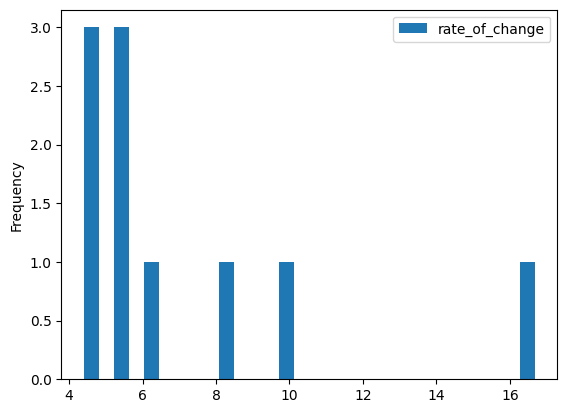

In [92]:
ten_close.plot.hist(bins=30)

<Axes: ylabel='Frequency'>

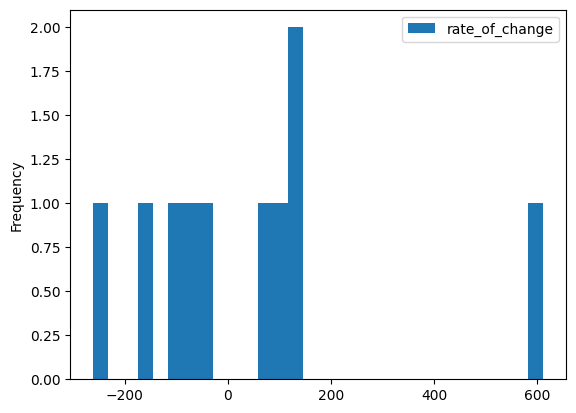

In [93]:
top_bottom_pct.plot.hist(bins=30)

Combine the two plots from above into a single plot, displaying both together. Your plot should have two Y-axis scales, should differentiate the two values by color, and should include a legend.

(array([1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 2., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([-2.62744729e+02, -2.33575680e+02, -2.04406631e+02, -1.75237582e+02,
        -1.46068533e+02, -1.16899484e+02, -8.77304354e+01, -5.85613864e+01,
        -2.93923374e+01, -2.23288486e-01,  2.89457605e+01,  5.81148094e+01,
         8.72838584e+01,  1.16452907e+02,  1.45621956e+02,  1.74791005e+02,
         2.03960054e+02,  2.33129103e+02,  2.62298152e+02,  2.91467201e+02,
         3.20636250e+02,  3.49805299e+02,  3.78974348e+02,  4.08143397e+02,
         4.37312446e+02,  4.66481495e+02,  4.95650544e+02,  5.24819593e+02,
         5.53988642e+02,  5.83157691e+02,  6.12326740e+02]),
 <BarContainer object of 30 artists>)

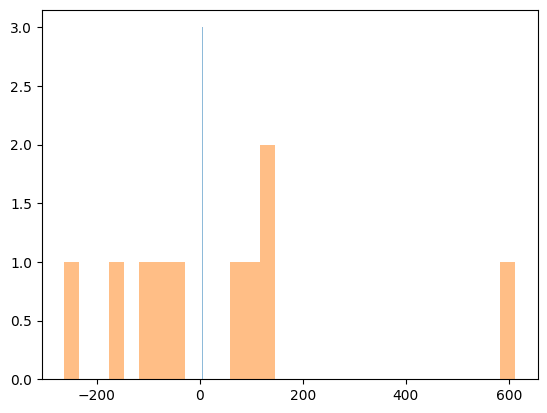

In [94]:
pyplot.hist(ten_close.rate_of_change, bins=30, alpha=0.5, label='Absolute change')
pyplot.hist(top_bottom_pct.rate_of_change, bins=30, alpha=0.5, label='Percent change')

I am unable to create a plot that represents the two data sets well, given the difference in magnitude between percent changes and actual changes.